# Deep Learning and Computer Vision
## Regularization, Data augmentation and transfer learning

The aim of this exercise is to code a CNN that provides the best results you can on a classification
task. The idea is to test the different tools studied during the lecture and to measure their impact on
the provided dataset.
This dataset is constituted by 10 categories of flowers.
It contains 800 color images: 600 (60 per category) are in the training set and 200 (20 per category)
in the validation set. The train/validation split is provided.
The images have different sizes, so it is required to resize them to 128x128.
For this exercise, you have to:
- Work only with images whose sizes are 128x128.
- Train your network only on the training set (not on the validation set).
- Cite the references of any code found online and be able to explain it.
You have to improve the performance of the provided network step by step.

You have to submit a report for this exercise (groups from 1 to 3 students).
The deadline is March 28th
 for the report.
Each time you have an idea to improve the results, you have to create a new section in your report
in which you:
- Give some details about your idea.
- Explain why do you think it could be good to test this idea.
- Provide the code for this idea.
- Provide the results.
At least, the next steps have to be explored (maybe not in this order):
- Your own architecture trained from scratch.
- Some regularization tools.
- Data augmentation.
- Fine tuning a pre-trained CNN.


In [1]:
import tensorflow as tf
from tensorflow import keras

Load the dataset

In [3]:
# Load the dataset
train_ds = keras.utils.image_dataset_from_directory(
    directory='data/Flowers/Train',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(128, 128))
validation_ds = keras.utils.image_dataset_from_directory(
    directory='data/Flowers/Test',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(128, 128))

Found 600 files belonging to 10 classes.
Found 200 files belonging to 10 classes.


In [13]:
class_names = train_ds.class_names
print(class_names)

['Fleurs0', 'Fleurs1', 'Fleurs2', 'Fleurs3', 'Fleurs4', 'Fleurs5', 'Fleurs6', 'Fleurs7', 'Fleurs8', 'Fleurs9']


Visualize some images from the dataset

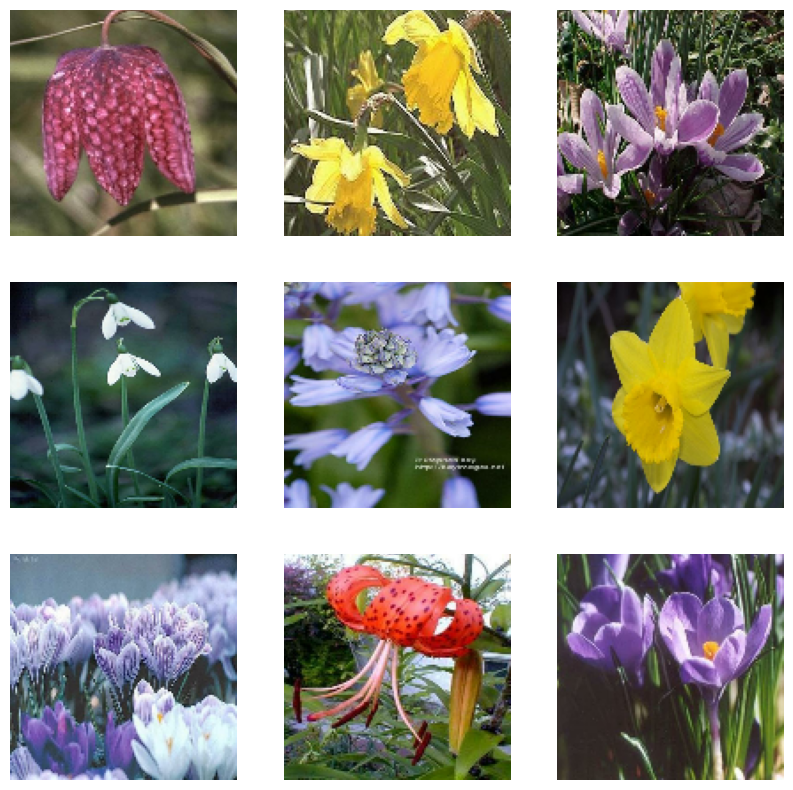

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

Now we normalize the pixel values between 0 and 1. We then add a channels dimension to the images to make them compatible with the CNN architecture.


In [17]:
x_train = train_ds
x_test = validation_ds

# Normalize the pixel values between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

AttributeError: 'BatchDataset' object has no attribute 'astype'

The model architecture consists of two convolutional layers with max pooling, followed by a flattening layer, dropout layer, and a dense output layer with softmax activation.

We compile the model using the sparse categorical crossentropy loss function, the Adam optimizer, and the accuracy metric. We then train the model on the training set, using a batch size of 128 and 5 epochs.

Finally, we evaluate the model on the test set and print the test loss and accuracy.

In [ ]:
# Define the model architecture
model = keras.Sequential(
    [
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.1)

# Evaluate the model on the test set
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

# References:

[1] https://www.tensorflow.org/tutorials/images/classification
